In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import shap
from sklearn.model_selection import GridSearchCV

In [2]:
housing = pd.read_csv('resale_prices15.csv')
housing = pd.concat([housing, pd.read_csv('resale_prices17.csv')])

In [3]:
housing.head(20)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,65,293000.0
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,62,300000.0
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,68.0,New Generation,1985,69,307500.0


## DATA CLEANING

In [4]:
# Checking for null values
housing.isnull().sum()*100/housing.shape[0] 

month                  0.0
town                   0.0
flat_type              0.0
block                  0.0
street_name            0.0
storey_range           0.0
floor_area_sqm         0.0
flat_model             0.0
lease_commence_date    0.0
remaining_lease        0.0
resale_price           0.0
dtype: float64

In [5]:
# Dropping 'street_name' and 'block' columns as it might not be useful
drop_cols = ['street_name', 'block']
housing = housing.drop(drop_cols, axis=1)

In [6]:
housing["month"]= pd.to_datetime(housing["month"]).dt.month

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183033 entries, 0 to 145879
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                183033 non-null  int64  
 1   town                 183033 non-null  object 
 2   flat_type            183033 non-null  object 
 3   storey_range         183033 non-null  object 
 4   floor_area_sqm       183033 non-null  float64
 5   flat_model           183033 non-null  object 
 6   lease_commence_date  183033 non-null  int64  
 7   remaining_lease      183033 non-null  int64  
 8   resale_price         183033 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.0+ MB


## EDA

In [8]:
#focus on eda(what i want to see)

In [9]:
# sns.pairplot(housing)

After EDA, we have decided to drop lease commence date due to having correlation with remaining lease.

In [10]:
drop_cols = ['lease_commence_date', 'month']
housing = housing.drop(drop_cols, axis=1)

In [11]:
len(housing.town.unique())

26

<AxesSubplot:xlabel='town'>

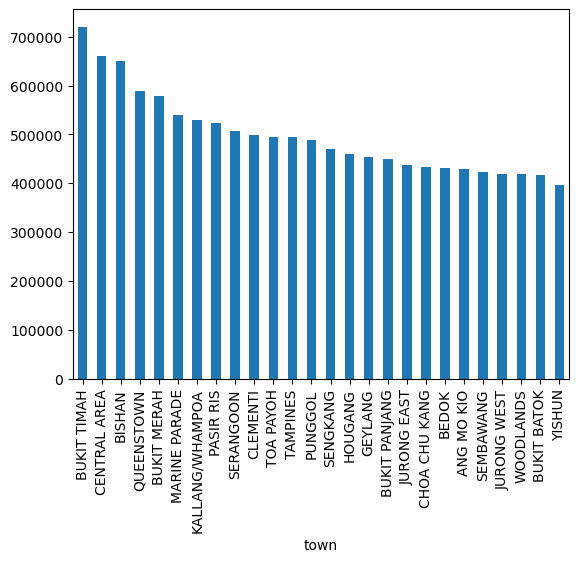

In [12]:
housing.groupby('town').resale_price.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='town'>

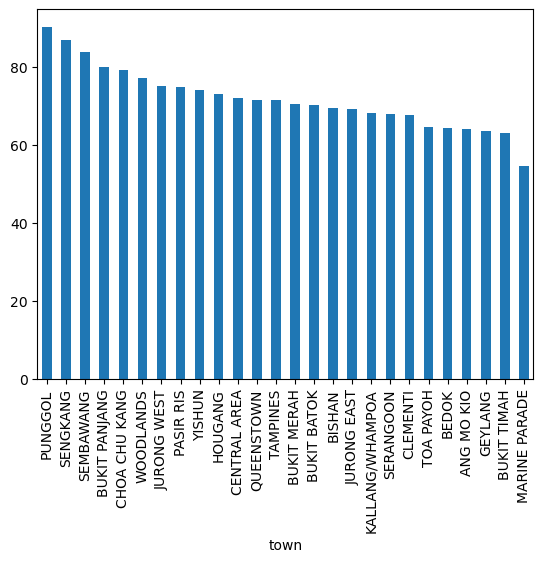

In [13]:
housing.groupby('town').remaining_lease.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='town'>

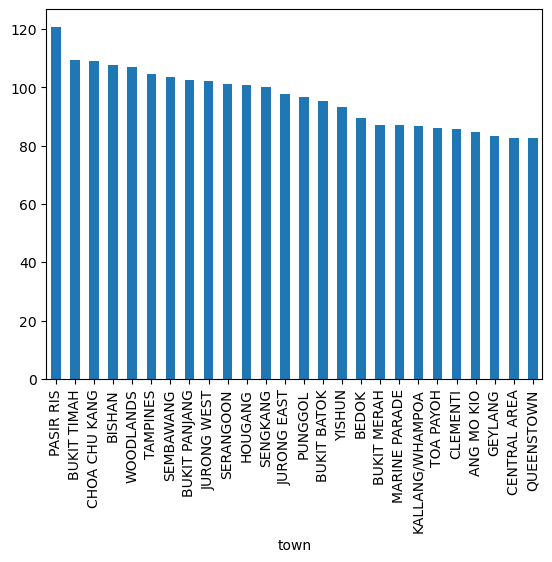

In [14]:
housing.groupby('town').floor_area_sqm.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='storey_range'>

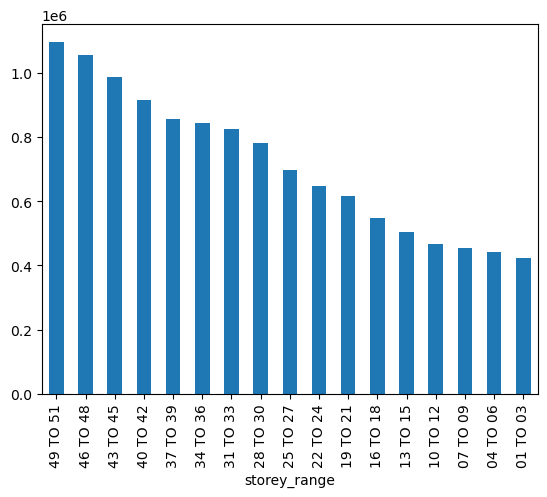

In [15]:
housing.groupby('storey_range').resale_price.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='flat_type'>

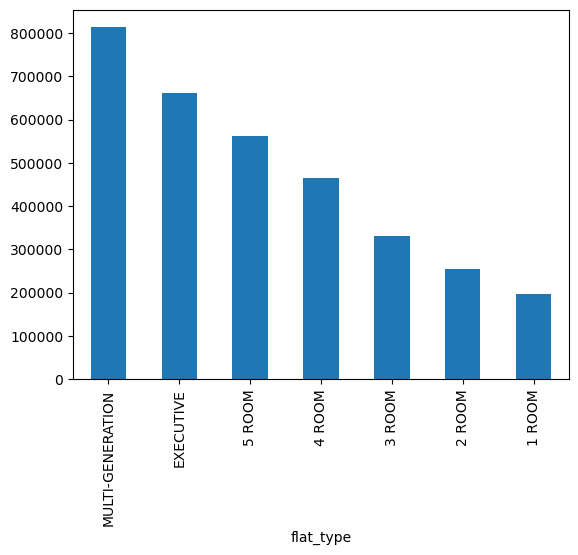

In [16]:
housing.groupby('flat_type').resale_price.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='flat_type'>

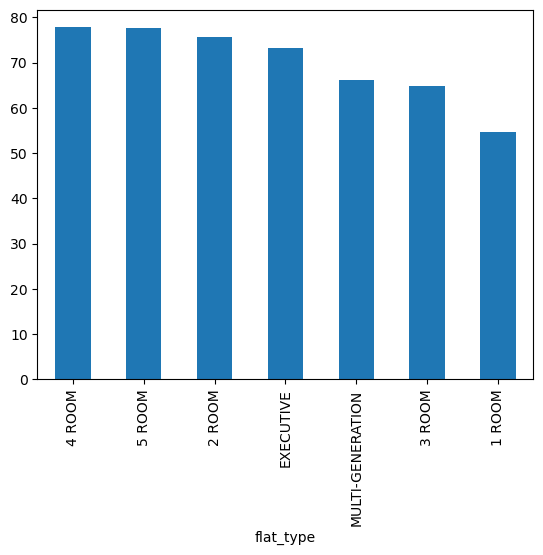

In [17]:
housing.groupby('flat_type').remaining_lease.mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='flat_model'>

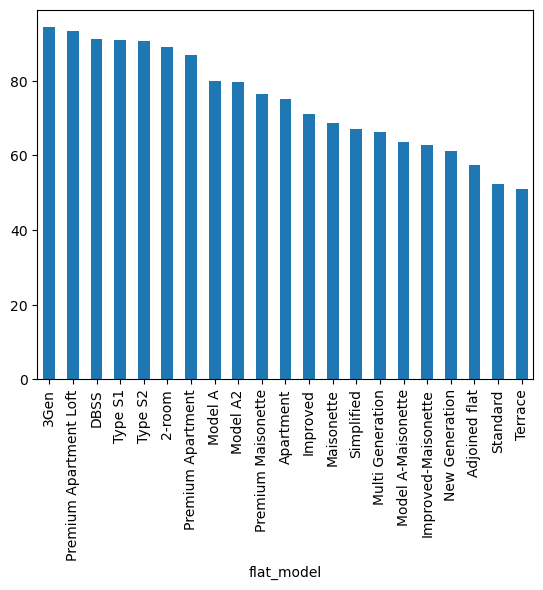

In [18]:
housing.groupby('flat_model').remaining_lease.mean().sort_values(ascending=False).plot(kind='bar')

## Modelling

In [19]:
# This is for storey range
ordinal_ranking_storey = sorted(housing.storey_range.unique())
oe_storey = OrdinalEncoder(categories=[ordinal_ranking_storey],
                    handle_unknown = "use_encoded_value",
                     unknown_value=-1)

In [20]:
# This is for flat type
ordinal_ranking_type = sorted(housing.flat_type.unique())
oe_type = OrdinalEncoder(categories=[ordinal_ranking_type],
                    handle_unknown = "use_encoded_value",
                     unknown_value=-1)

In [21]:
#instantiate ohe object
ohe = OneHotEncoder(handle_unknown="ignore")

# apply column transformer on nominal_feature, ordinal_feature. See visual above for understanding.
ct = make_column_transformer(
    (oe_type, ["flat_type"] ),
    (oe_storey, ["storey_range"] ),
    (ohe, ["town", "flat_model"] ),
    remainder="passthrough" # in this case there is no remainder
    )

### Linear Regression

In [22]:
lr = LinearRegression()

In [23]:
X = housing.drop('resale_price', axis=1)
y = housing.resale_price

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [25]:
model_pipe = make_pipeline(ct, lr)
model_pipe.fit(X_train, y_train);
model_pipe.score(X_train, y_train)

0.795926462883561

In [26]:
model_pipe.score(X_test, y_test)

0.7945671463206959

In [27]:
cross_val_score(model_pipe, X_train, y_train).mean()

0.7957006619164171

In [28]:
pred_train_lr=model_pipe.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

72538.71662076398
0.795926462883561


In [29]:
pred_test_lr= model_pipe.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

72969.34328191951
0.7945671463206959


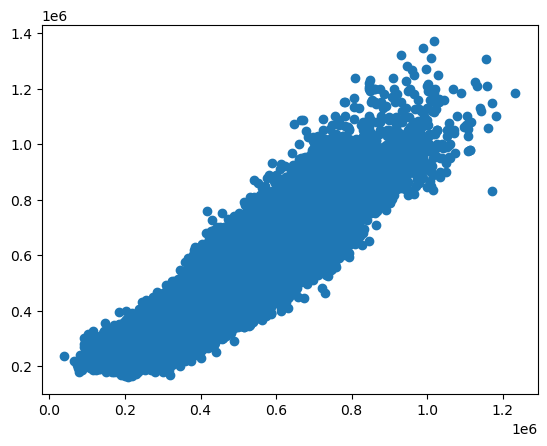

In [30]:
#l - Linear relationship
plt.scatter(pred_test_lr, y_test)

In [31]:
# I - Independent errors
# assumed

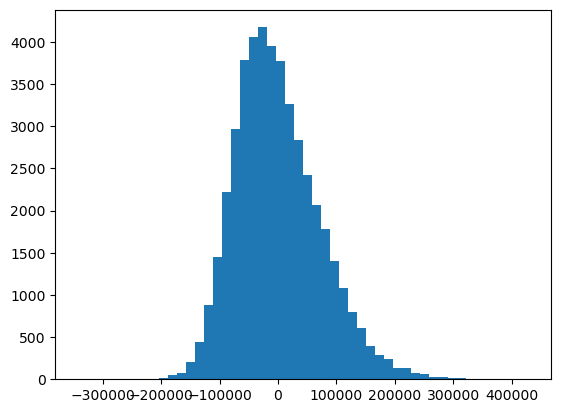

In [32]:
# N - Normally distributed errors
resids = y_test - pred_test_lr
plt.hist(resids, bins=50);

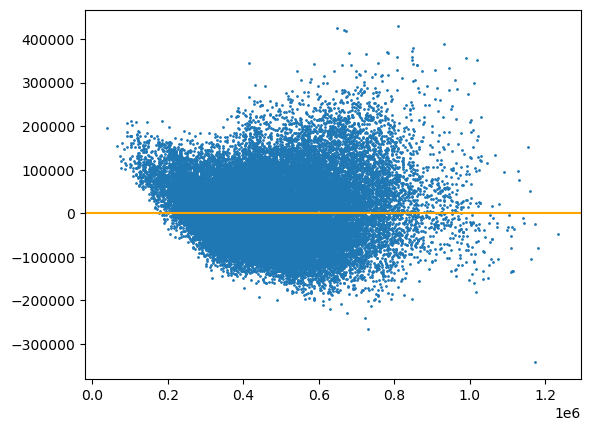

In [33]:
# E - Equal variance of errors (homoscedasticity)
plt.scatter(pred_test_lr, resids, s=1)
plt.axhline(0, color="orange")

### Random Forest Regressor

In [34]:
rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [ ]:
randomforestregressor

In [36]:
model_pipe_rfr = make_pipeline(ct, rfr)
model_pipe_rfr.fit(X_train, y_train);
score = model_pipe_rfr.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9611682042912242


In [37]:
model_pipe_rfr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['1 '
                                                                              'ROOM',
                                                                              '2 '
                                                                              'ROOM',
                                                                              '3 '
                                                                              'ROOM',
                                                                              '4 '
                                                                              'ROOM',
                                                                              '5 '
                                                                         

In [ ]:
model_pipe_rfr.score(X_test, y_test) #R-squared

In [ ]:
pred_test_rfr= model_pipe_rfr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rfr))) 
print(r2_score(y_test, pred_test_rfr))

In [38]:
param_grid = {
    'randomforestregressor__bootstrap': [True],
    'randomforestregressor__max_depth': [80, 90, 100, 110],
    'randomforestregressor__max_features': [2, 3],
    'randomforestregressor__min_samples_leaf': [3, 4, 5],
    'randomforestregressor__min_samples_split': [8, 10, 12],
    'randomforestregressor__n_estimators': [100, 200, 300, 1000]
}

In [39]:
grid_search = GridSearchCV(model_pipe_rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
